# Tarea 5
## Luciano Andres Juárez López

# Ejercicio 1

In [ ]:
# install.packages("fda")

In [ ]:
# Leemos los datos de LST y NDVI
load("./LSTNDVIpts.RData")

In [ ]:
head(Dlst2)
print(dim(Dlst2))

datos.2  datos.3  datos.4  datos.6  datos.7  datos.8  datos.9  datos.10
1 21.43031 21.27650 23.04703 14.27639 18.51132 23.22135 21.67640 22.29507
2 26.13350 23.98015 36.41060 25.38196 24.84669 33.87339 33.89231 27.91846
3 38.99210 38.89981 40.60540 29.71217 14.36184 39.29972 37.91200 26.27706
4 35.05453 34.95200 36.35680 27.81859 27.46311 34.25814 34.50082 31.88261
5 43.63718 33.17973 45.69141 31.87236 33.50959 38.40078 41.61713 39.35782
6 34.48043 33.42164 37.06488 26.84100 26.07755 34.29139 33.98058 10.00045
  datos.11 datos.13 ⋯ datos.201 datos.202 datos.203 datos.204 datos.205
1 22.15835 21.72426 ⋯ 21.10218  20.98255  22.01137  27.47679  23.07779 
2 29.15033 37.55400 ⋯ 33.57750  27.43577  28.04759  26.95725  36.33448 
3 29.88677 39.73722 ⋯ 37.50184  40.70452  40.07903  48.18657  39.74064 
4 38.22646 35.60142 ⋯ 34.28890  36.02525  35.72789  45.71876  35.71421 
5 42.41011 45.34961 ⋯ 40.58489  43.19626  44.36522  50.84237  42.07173 
6 13.88332 44.09520 ⋯ 34.32554  35.37939  34.87754  41.53769  46.39553 
  datos.206 datos.207 datos.208 datos.209 datos.210
1 23.04361  22.41128  23.29655  22.44546  20.83216 
2 34.21869  36.55010  34.46305  36.33956  28.91045 
3 36.90026  41.00873  34.43587  40.97796  12.08202 
4 34.65805  36.99255  33.70784  35.76548  32.52178 
5 43.53806  45.08301  41.13519  44.13963  40.15764 
6 35.14200  36.87809  34.62291  37.11280  37.82655

[1]  72 158


In [ ]:
head(Dndvi2)
print(dim(Dndvi2))

datos.2    datos.3    datos.4    datos.6   datos.7   datos.8   datos.9  
1 0.06815710 0.09955841 0.06825064 0.2600433 0.7076052 0.3440751 0.3819565
2 0.13419189 0.25138372 0.06667200 0.3266099 0.6864705 0.3612706 0.3908429
3 0.08359544 0.10281015 0.05756364 0.3012847 0.6742708 0.2918369 0.4465471
4 0.07615615 0.12552658 0.08334237 0.2927930 0.6190314 0.2599301 0.3092119
5 0.10358041 0.13581500 0.09485308 0.4183242 0.7974163 0.5285875 0.4926508
6 0.10205212 0.13552190 0.07474834 0.3380260 0.7303713 0.3870984 0.4151791
  datos.10  datos.11  datos.13   ⋯ datos.201 datos.202  datos.203 datos.204 
1 0.6159417 0.3186409 0.07981670 ⋯ 0.1331171 0.08760167 0.1532820 0.02004867
2 0.6857731 0.3849205 0.10178702 ⋯ 0.2171501 0.14361027 0.1474179 0.04558608
3 0.6891246 0.3860856 0.08425577 ⋯ 0.2453105 0.06658349 0.1744812 0.02099859
4 0.6791221 0.4212711 0.08348811 ⋯ 0.2491909 0.10094278 0.1631438 0.04456396
5 0.8402793 0.3851463 0.09263365 ⋯ 0.2600770 0.08803450 0.1918353 0.05777428
6 0.5620583 0.4060087 0.18101697 ⋯ 0.2264134 0.10019950 0.1765547 0.03834546
  datos.205 datos.206 datos.207  datos.208 datos.209  datos.210
1 0.3462487 0.5859301 0.08030228 0.2255751 0.09487126 0.4025457
2 0.2794482 0.5367887 0.08629168 0.2681260 0.11430092 0.4430785
3 0.3040636 0.7970120 0.07391349 0.2605605 0.12296999 0.4335298
4 0.1958299 0.4823360 0.10180166 0.2770370 0.12128323 0.4125029
5 0.3926235 0.4525258 0.10499287 0.3352796 0.14829174 0.4981871
6 0.2085837 0.5581556 0.09213687 0.2708463 0.13041269 0.4312555

[1]  72 158


In [ ]:
# Lo convertimos en una matriz
Dndvi2 <- as.matrix(Dndvi2)

In [ ]:
library(fda)

## Respuesta escalar $\max_{t \in \tilde{T}} \text{LST}(t)$ y predictor funcional $\text{NDVI}(t)$.

In [ ]:
# Definimos la respuesta escalar
LST.max <- apply(Dlst2, 2, max)

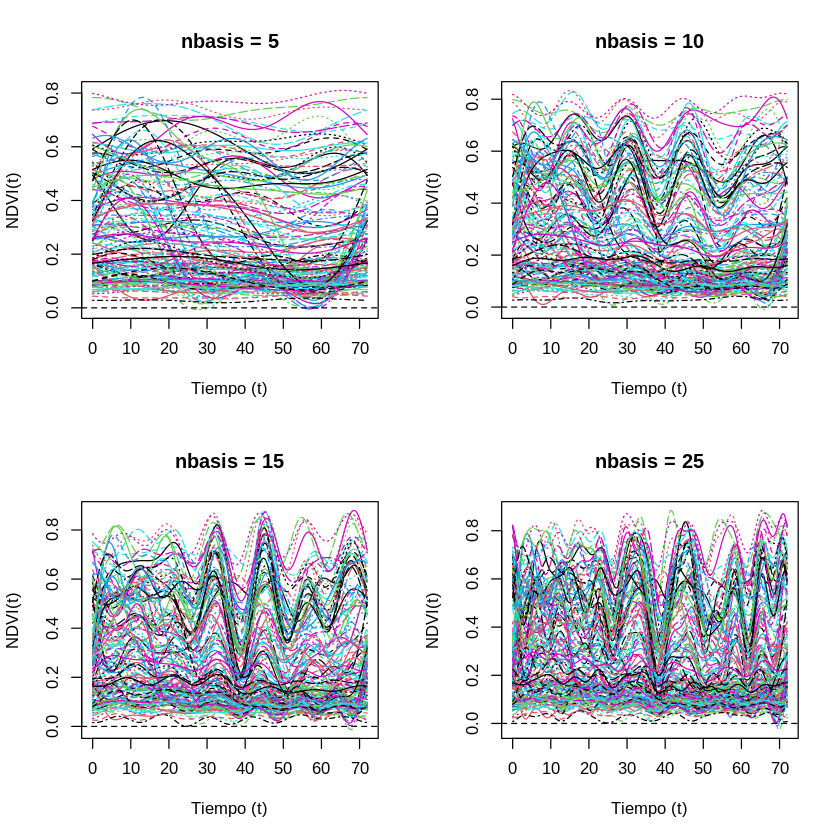

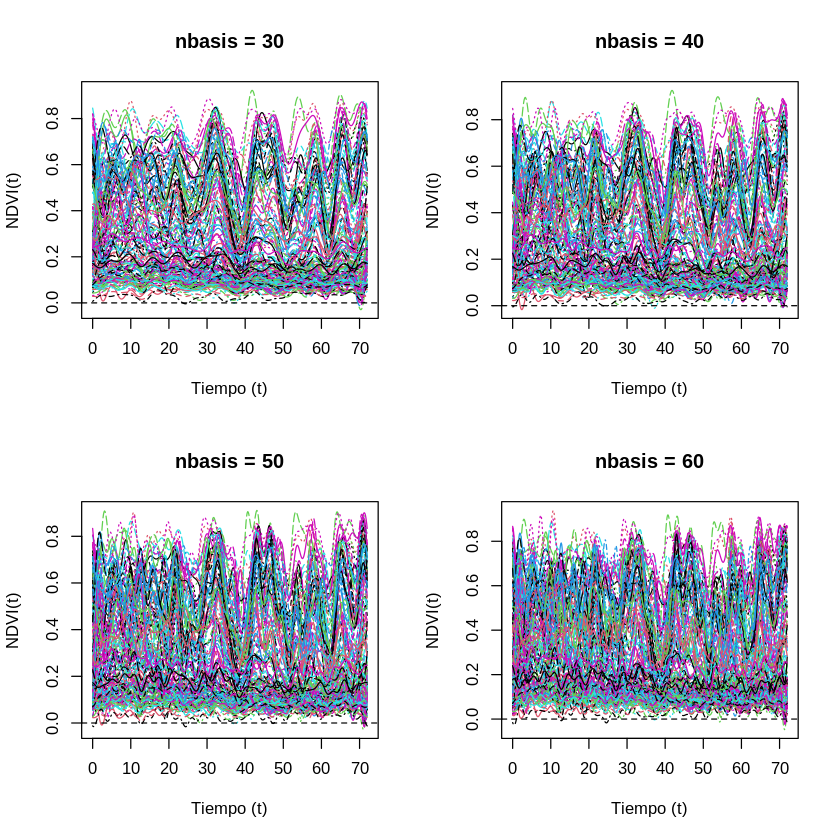

In [ ]:
# Buscamos el numero de base, con el cual no haya un sobreajuste
# Definimos diferentes numeros de base
nbasis.v <- c(5, 10, 15, 25, 30, 40, 50, 60)

# Suavizar y graficar para cada valor de nbasis
par(mfrow = c(2, 2))  # Configuración para múltiples gráficos
for (nbasis in nbasis.v) {
  NDVI.basis <- create.fourier.basis(rangeval = c(0, 72), nbasis = nbasis)
  NDVI.fd <- smooth.basis(1:72, Dndvi2, NDVI.basis)$fd
  # Graficar las curvas
  plot(NDVI.fd, main = paste("nbasis =", nbasis), xlab = "Tiempo (t)", ylab = "NDVI(t)")
}

De acuerdo a las graficas, podemos observar que la mejor base es cuando nbasis es igual a 15, pues al comparar con valores más altos se observa que las curvas se vuelven más complejas e irregulares, lo que sugiere un posible sobreajuste al ruido de los datos.

In [ ]:
# Definimos el predictor funcional
NDVI.basis <- create.fourier.basis(rangeval = c(0, 72), nbasis = 15)
NDVI.fd <- smooth.basis(1:72, Dndvi2, NDVI.basis)$fd

model.escalar <- fRegress(LST.max ~ NDVI.fd, method="fRegress")

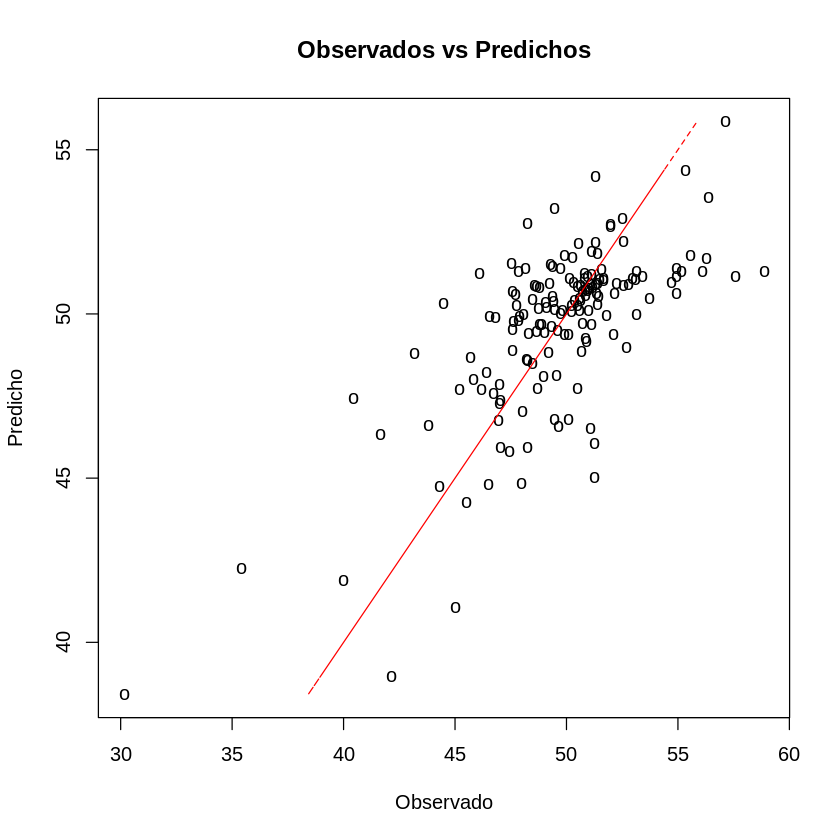

In [ ]:
# Cuando la respuesta es escalar, la predicción se encuentra en:
LST.predict <- model.escalar$yhatfdobj

# Datos Vs ajuste
plot(LST.max, LST.predict, type="p", pch="o", main = "Observados vs Predichos", xlab = "Observado", ylab = "Predicho")
lines(LST.predict, LST.predict, lty=2, col = "red")

La mayoría de los puntos parecen alinearse bien con la línea roja, Esto sugiere que el modelo capta adecuadamente la relación entre NDVI y LSTmax.

In [ ]:
# RMSE
rmse <- sqrt(mean((LST.max - LST.predict)^2))
print(paste("RMSE del modelo:", round(rmse, 3)))

[1] "RMSE del modelo: 2.553"


El RMSE igual a 2.553, nos sugiere un modelo razonablemente preciso

In [ ]:
names(model.escalar$betaestlist)

[1] "const"   "NDVI.fd"

[1] "done"

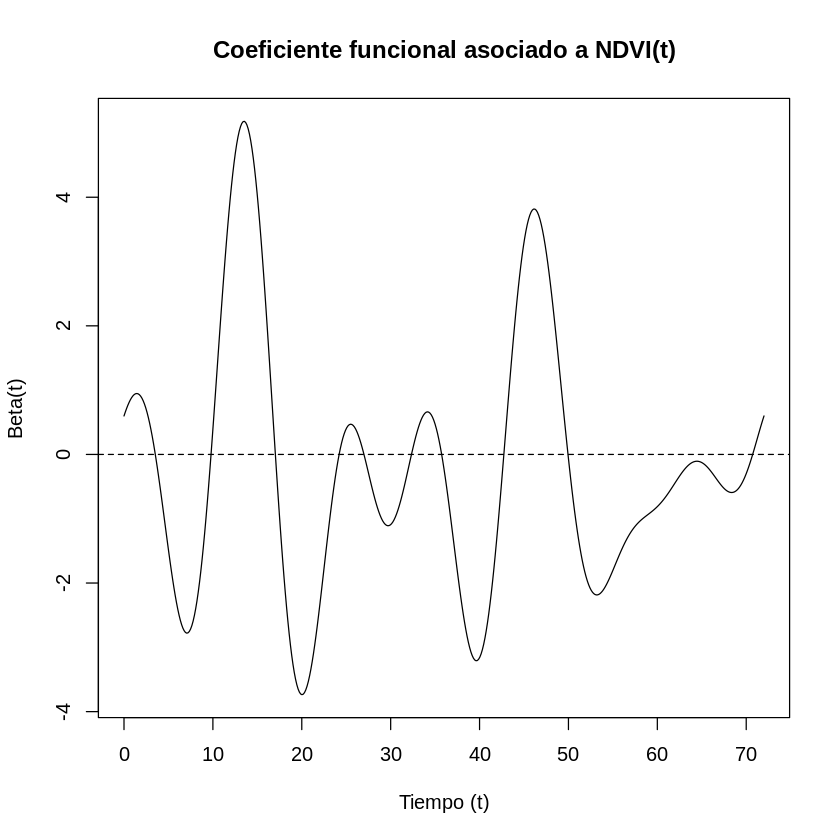

In [ ]:
# Coeficiente funcional de regresión estimado
plot(model.escalar$betaestlist[[2]], main = "Coeficiente funcional asociado a NDVI(t)", xlab = "Tiempo (t)", ylab = "Beta(t)")

La gráfica muestra que el efecto del NDVI(t) en la temperatura máxima superficial cambia a lo largo del tiempo. Cuando los valores de beta son positivos, la vegetación está relacionada con un aumento de la temperatura. En cambio, cuando los valores son negativos, la vegetación ayuda a reducir la temperatura, mostrando un efecto de enfriamiento.

## Respuesta funcional $\text{LST}^*(t) = \frac{1}{6} \sum_{k=0}^{5} \text{LST}(t + 12k)$ con $t = 1, \ldots, 12$ y predictor escalar $\text{STtD}(\text{NDVI})$.

In [ ]:
# Definimos la respuesta funcional
n_months <- 12  # Numero de meses
n_sites <- ncol(Dlst2)  # Numero de sitios
LST.star <- matrix(0, nrow = n_months, ncol = n_sites)

# Obtenemos el promedio estacional para cada mes
for (t in 1:n_months) {
  indices <- seq(t, by = n_months, length.out = 6)
  LST.star[t, ] <- apply(Dlst2[indices, ], 2, sum)/6
}

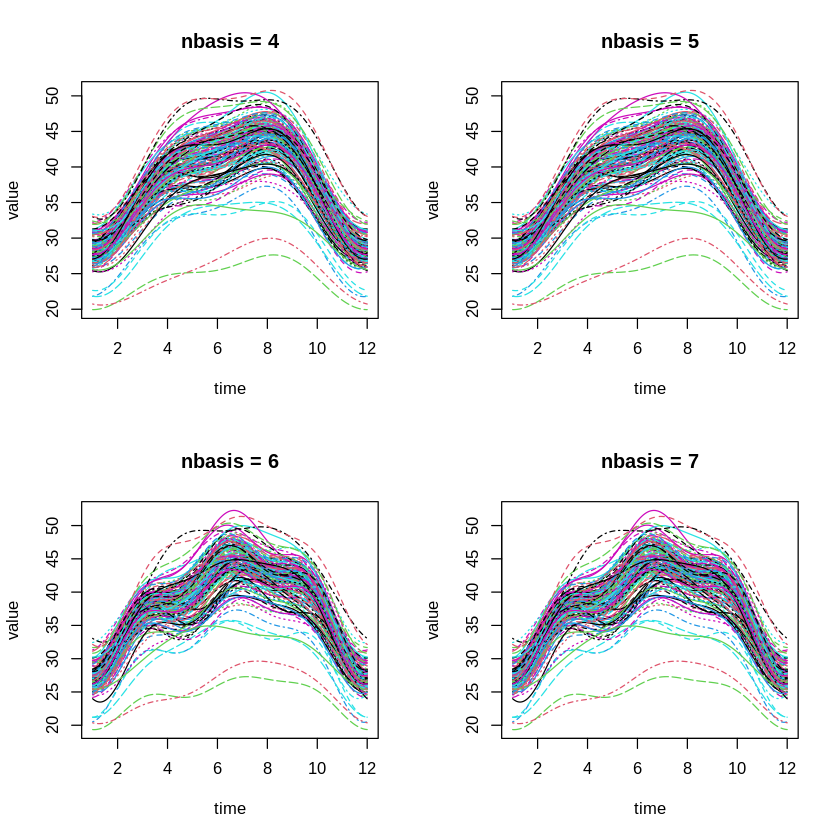

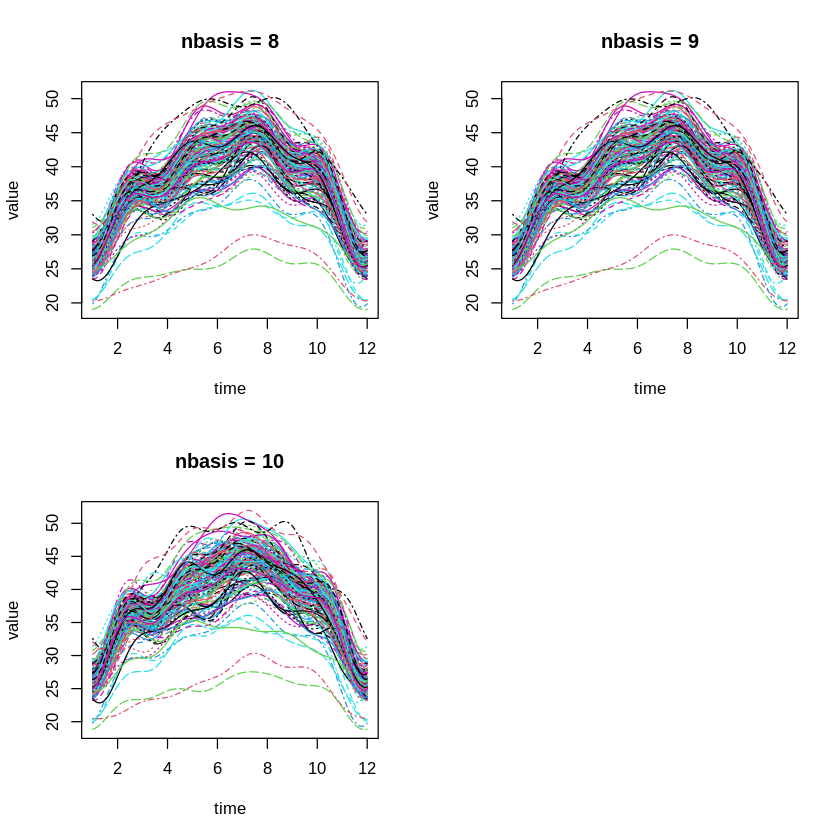

In [ ]:
# Buscamos el numero de base, con el cual no haya un sobreajuste
# Definimos diferentes numeros de base
nbasis.v <- c(4, 5, 6, 7, 8, 9, 10)

# Suavizar y graficar para cada valor de nbasis
par(mfrow = c(2, 2))  # Configuración para múltiples gráficos
for (nbasis in nbasis.v) {
  LST.basis <- create.fourier.basis(rangeval = c(1, n_months), nbasis = nbasis)
  LST.star.fd <- smooth.basis(1:n_months, LST.star, LST.basis)$fd

  # Graficar LST*(t) para todos los sitios
  plot(LST.star.fd, main = paste("nbasis =", nbasis))
}

De acuerdo a estas graficas, seleccionamos nbasis igual a 6, pues captura adecuadamente las tendencias estacionales a lo largo de los meses, de igual forma no refleja ruido.

In [ ]:
LST.basis <- create.fourier.basis(rangeval = c(1, n_months), nbasis = 6)
LST.star.fd <- smooth.basis(1:n_months, LST.star, LST.basis)$fd

In [ ]:
source("STtD.R")

# Calculamos STtD para NDVI
STtD.NDVI <- STtDfn(as.data.frame(t(Dndvi2)))

In [ ]:
# Ajustamos el modelo funcional con predictor escalar STtD(NDVI)
model.functional <- fRegress(LST.star.fd ~ STtD.NDVI)

[1] "done"

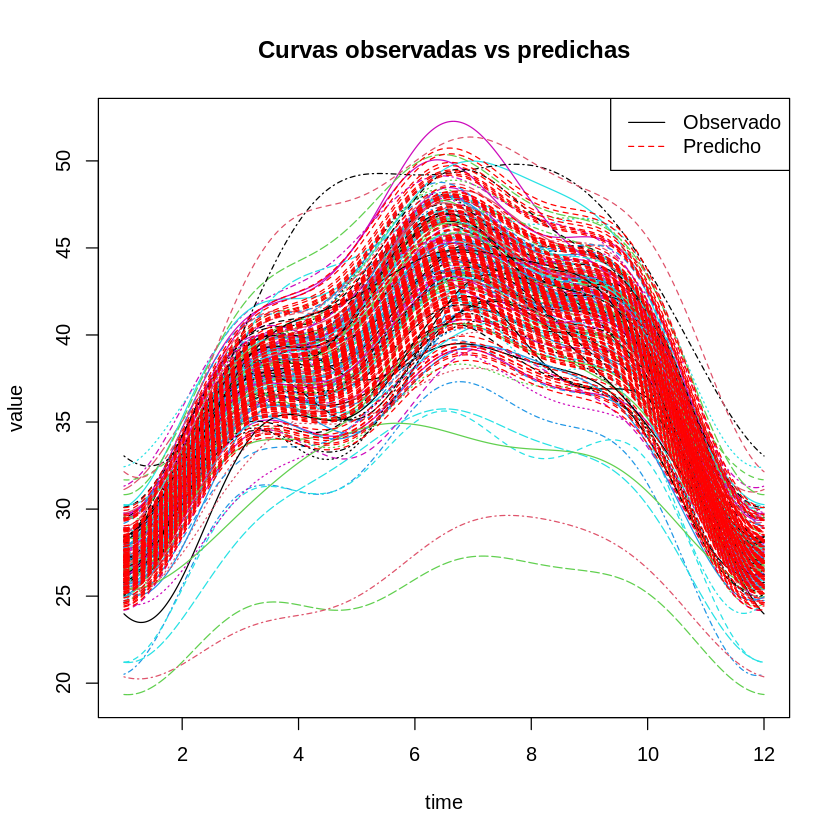

In [ ]:
LST.star.pred <- model.functional$yhatfdobj
plot(LST.star.fd, main = "Curvas observadas vs predichas")
lines(LST.star.pred, col = "red", lty = 2)
legend("topright", legend = c("Observado", "Predicho"), col = c("black", "red"), lty = c(1, 2))


Podemos observar que las predicciones son suaves y no presentan oscilaciones extrañas. Por lo que podemos decir que el modelo está capturando correctamente los patrones principales sin sobreajustar los datos.

In [ ]:
# Calcular el RMSE
observed <- LST.star  # Valores originales
predicted <- eval.fd(1:n_months, model.functional$yhatfdobj)  # Predicciones
rmse <- sqrt(mean((observed - predicted)^2))
print(paste("RMSE del modelo funcional:", round(rmse, 3)))


[1] "RMSE del modelo funcional: 2.541"


El RMSE igual a 2.541, nos sugiere un modelo razonablemente preciso

In [ ]:
names(model.functional$betaestlist)

[1] "const"     "STtD.NDVI"

[1] "done"

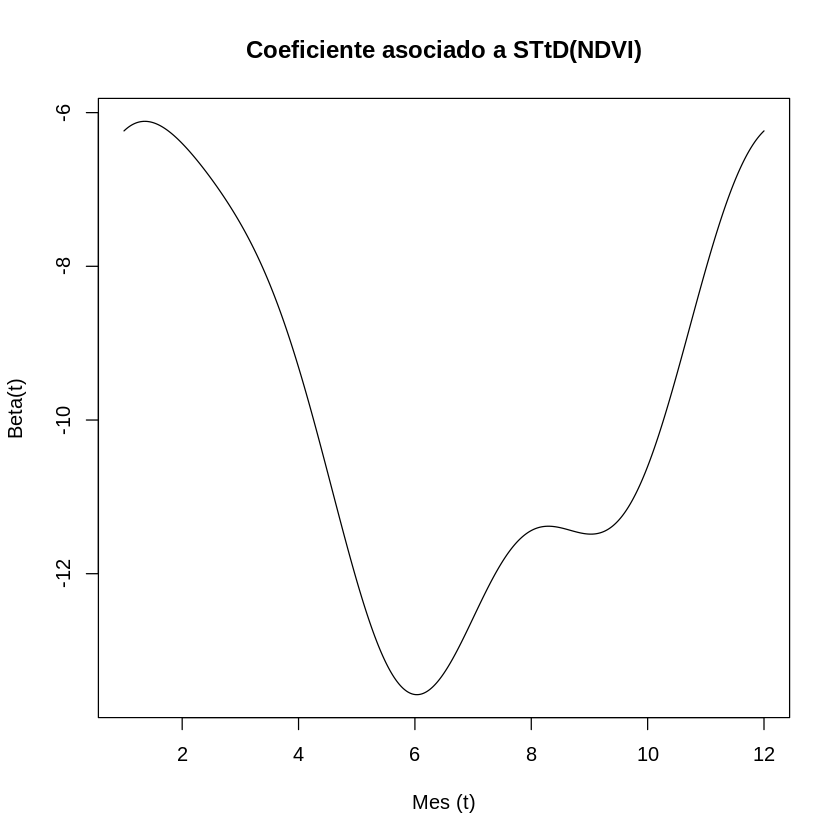

In [ ]:
coef <- model.functional$betaestlist
plot(coef[[2]], main = "Coeficiente asociado a STtD(NDVI)", xlab = "Mes (t)", ylab = "Beta(t)")

Podemos observar que cuando beta toma su valore más negativo, es en el mes de junio, coincidiendo con el inicio del verano, cuando las temperaturas suelen ser las más altas.

## Respuesta funcional $\text{LST}_{23}(t)$ y predictor funcional $\text{NDVI}_{23}(t)$, donde $\text{LST}_{23}(t) = \text{LST}(t + 60)$ y $\text{NDVI}_{23}(t) = \text{NDVI}(t + 60)$ con $t = 1, \ldots, 12$.

In [ ]:
# Seleccionamos los ultimos 12 filas
LST23 <- as.matrix(Dlst2[61:72, ])
NVDI23 <- as.matrix(Dndvi2[61:72, ])

In [ ]:
# Buscamos el numero de base, con el cual no haya un sobreajuste
# Definimos diferentes numeros de base
nbasis.v <- c(4, 5, 6, 7, 8, 9, 10)

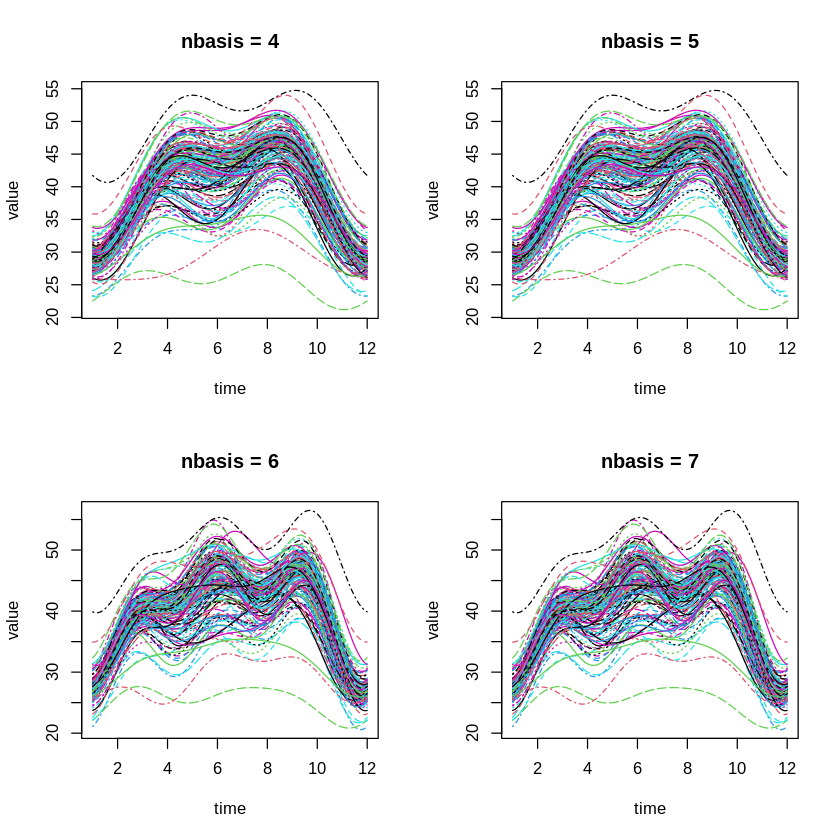

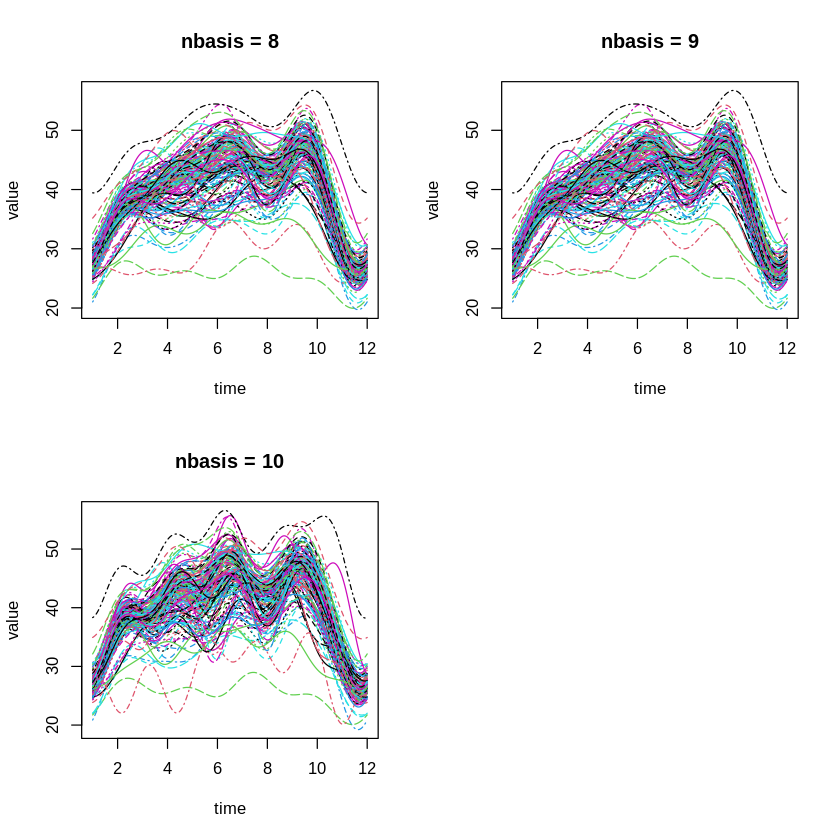

In [ ]:
# Suavizar y graficar para cada valor de nbasis
par(mfrow = c(2, 2))  # Configuración para múltiples gráficos
for (nbasis in nbasis.v) {
  LST23.basis <- create.fourier.basis(rangeval = c(1, 12), nbasis = nbasis)
  LST23.fd <- smooth.basis(1:12, LST23, LST23.basis)$fd

  # Graficar LST23 para todos los sitios
  plot(LST23.fd, main = paste("nbasis =", nbasis))
}

De acuerdo a estas graficas, seleccionamos nbasis igual a 6, pues captura adecuadamente las tendencias estacionales a lo largo de los meses, de igual forma no refleja ruido.

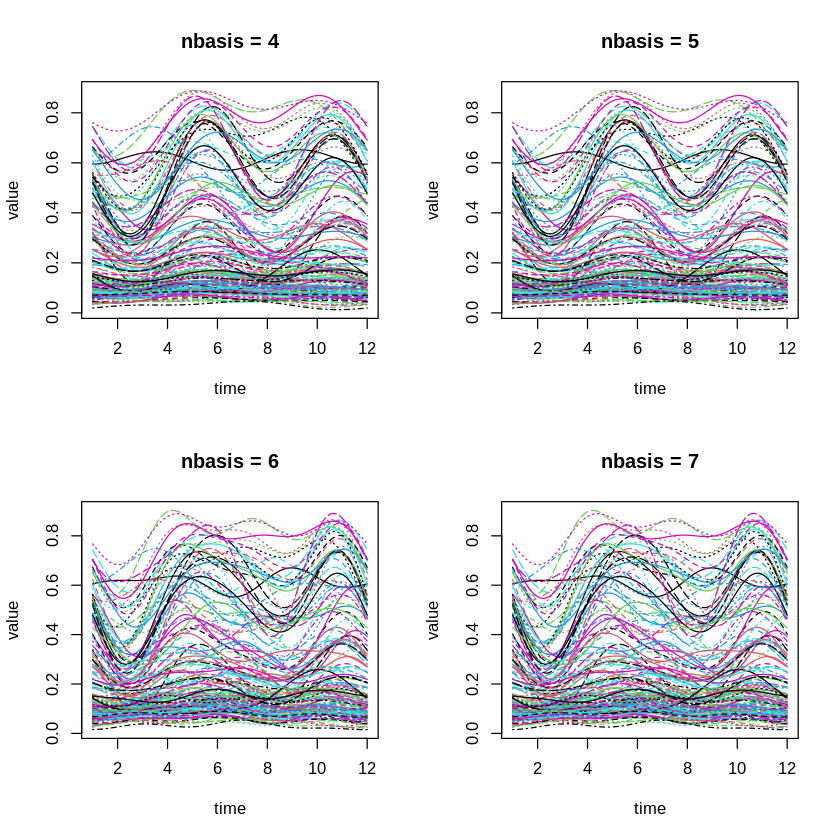

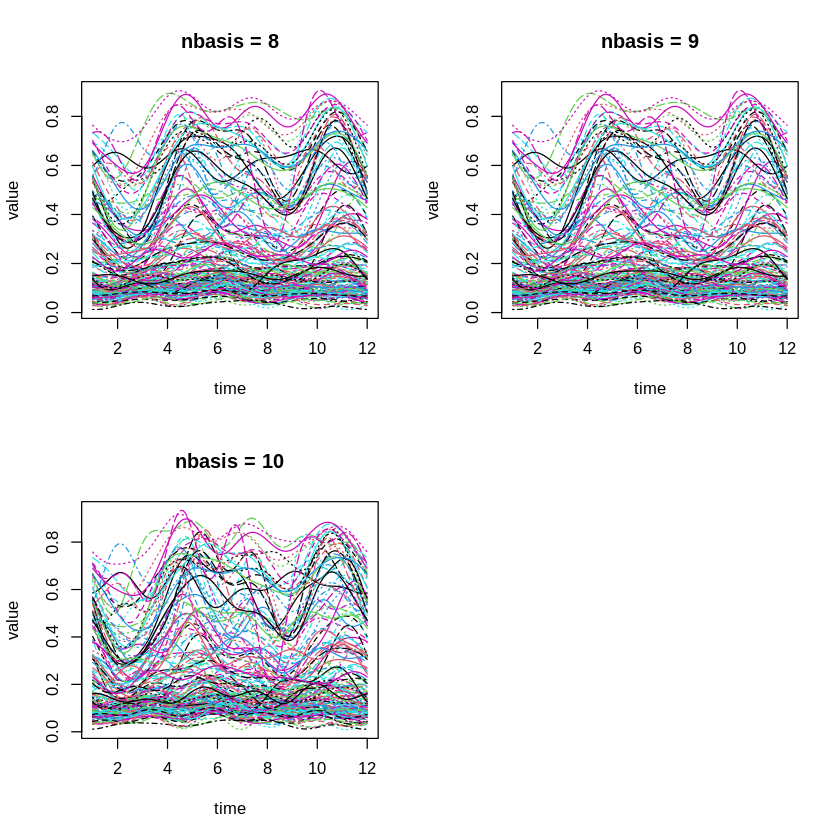

In [ ]:
# Suavizar y graficar para cada valor de nbasis
par(mfrow = c(2, 2))  # Configuración para múltiples gráficos
for (nbasis in nbasis.v) {
  NDVI23.basis <- create.fourier.basis(rangeval = c(1, 12), nbasis = nbasis)
  NDVI23.fd <- smooth.basis(1:12, NVDI23, NDVI23.basis)$fd

  # Graficar NDVI23 para todos los sitios
  plot(NDVI23.fd, main = paste("nbasis =", nbasis))
}

De acuerdo a estas graficas, seleccionamos nbasis igual a 6, pues captura adecuadamente las tendencias estacionales a lo largo de los meses, de igual forma no refleja ruido.

In [ ]:
LST23.basis <- create.fourier.basis(rangeval = c(1, 12), nbasis = 6)
LST23.fd <- smooth.basis(1:12, LST23, LST23.basis)$fd

NDVI23.basis <- create.fourier.basis(rangeval = c(1, 12), nbasis = 6)
NDVI23.fd <- smooth.basis(1:12, NVDI23, NDVI23.basis)$fd

In [ ]:
# Ajustamos el modelo funcional
model23 <- fRegress(LST23.fd ~ NDVI23.fd)

[1] "done"

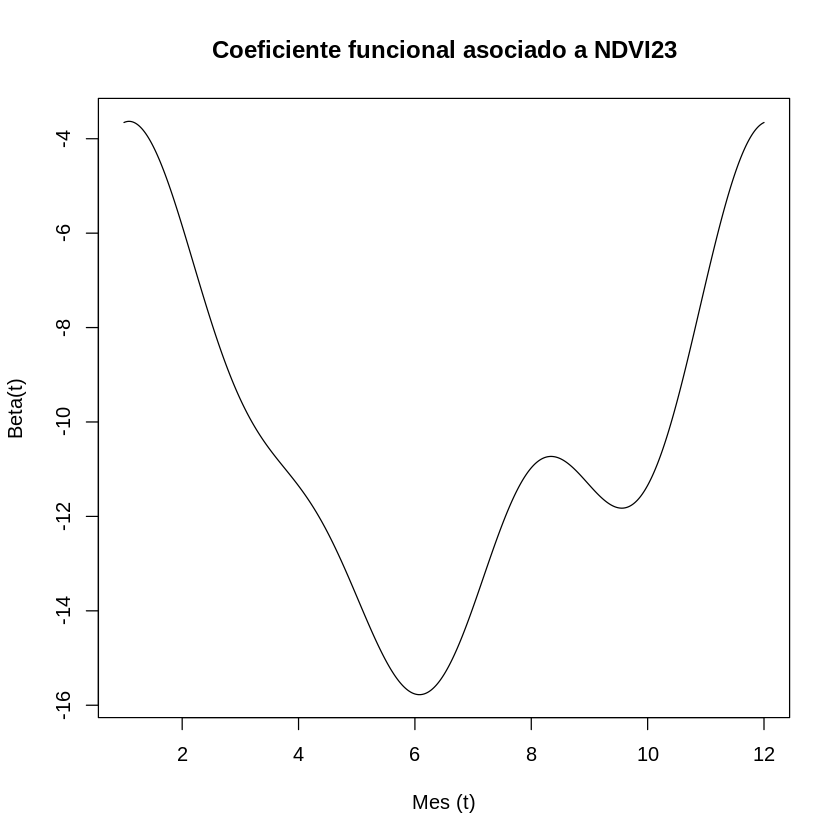

In [ ]:
# Coeficiente funcional estimado
plot(model23$betaestlist[[2]], main = "Coeficiente funcional asociado a NDVI23", xlab = "Mes (t)", ylab = "Beta(t)")

Podemos observar que cuando beta toma su valore más negativo, es en el mes de junio, coincidiendo con el inicio del verano, cuando las temperaturas suelen ser las más altas.

[1] "done"

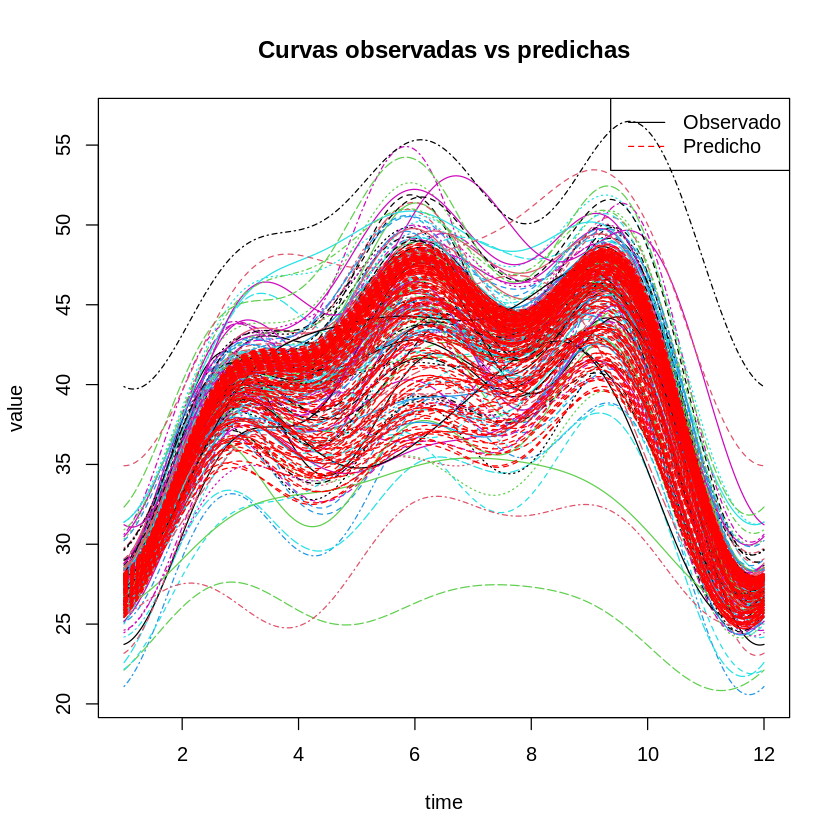

In [ ]:
# Predicciones del modelo funcional
LST23.pred <- model23$yhatfdobj

# Gráfica de comparación entre valores observados y predichos
plot(LST23.fd, main = "Curvas observadas vs predichas")
lines(LST23.pred, col = "red", lty = 2)
legend("topright", legend = c("Observado", "Predicho"), col = c("black", "red"), lty = c(1, 2))

Las curvas observadas y predichas están bien alineadas, lo que indica un buen ajuste general del modelo.

# Ejercicio 2

# Modelos en el Análisis de Regresión Funcional - Alcances, Ventajas y Limitaciones

El análisis de datos funcionales (FDA) y los modelos de regresión funcional son herramientas estadísticas avanzadas diseñadas para abordar problemas en los que las unidades de observación son funciones continuas. Este paradigma permite analizar datos complejos como curvas temporales, superficies espaciales y mediciones multivariadas, integrando regularización y replicación para mejorar la inferencia y la predicción.

## Alcances de los Modelos de Análisis de Datos Funcionales

En particular, los modelos de regresión funcional se dividen en tres categorías principales: regresión de predictores funcionales (scalar-on-function), regresión de respuestas funcionales (function-on-scalar) y regresión función-a-función (function-on-function). Estos modelos han encontrado aplicaciones en áreas como el análisis de imágenes médicas, la genética, y la economía.

## Ventajas de los Modelos de Regresión Funcional

Los modelos de regresión funcional permiten capturar relaciones complejas entre predictores y respuestas, integrando diversos métodos de regularización como bases de spline, componentes principales funcionales (fPC) y wavelets.

Una de sus principales fortalezas es la interpretabilidad. La capacidad de generar coeficientes funcionales permite identificar regiones específicas de una función donde las asociaciones son más significativas.

Haciendo uso de técnicas como las transformaciones de wavelet y la descomposición en componentes principales, pueden manejar conjuntos de datos de alta dimensionalidad de manera eficiente. Ademas evitan el sobreajuste al hacer uso de técnicas de regularización, como la penalización por suavidad, truncación y parsimonia, garantizando modelos robustos.

## Limitaciones

A pesar de los avances significativos en el campo del análisis de datos funcionales, los modelos de regresión funcional enfrentan varios desafíos que limitan su aplicación. Estos desafíos abarcan aspectos computacionales, metodológicos y de interpretación.

Uno de los principales retos es la elevada demanda computacional de estos modelos, especialmente en datos con alta resolución o grandes tamaños muestrales, lo que puede limitar su escalabilidad.

La selección adecuada de la base funcional es otra de las limitaciones, donde bases inadecuadas pueden llevar a modelos sobreajustados o poco optimos, lo cual afecta tanto la precisión predictiva como la interpretabilidad.

## Conclusión

El análisis de datos funcionales y los modelos de regresión funcional representan avances significativos en la estadística moderna, los desafíos relacionados con la complejidad computacional y la interpretación de resultados exigen un enfoque cuidadoso en la implementación y comunicación de los hallazgos.

# Ejercicio 3

## Profundidad no parametrica y regresión cuantil para datos funcionales

La profundidad espacial en dimensión finita es una medida estadística que evalúa la posición relativa de un punto con respecto a una nube de datos en un espacio de dimensión finita, como $\mathbb{R}^p$. Su idea principal es que los puntos cercanos al "centro" de la nube de datos tienen mayor profundidad que los que se encuentran en la periferia. Esta medida es útil para analizar la estructura de los datos, identificar valores centrales y detectar heterocedasticidad en contextos de regresión.

La profundidad espacial de un punto $y$ se define como $1 - \|S(y)\|$, donde $S(y)$ es el promedio de los vectores de dirección normalizados desde las observaciones hacia $y$. Si $y$ está cerca del centro de la nube de datos, $S(y)$ será cercano a 0, y la profundidad espacial será cercana a 1. En cambio, si $y$ está en la periferia, los vectores de dirección estarán más alineados y no se anularán entre sí, lo que resultará en un valor de $\|S(y)\|$ grande (cercano a 1) y, por lo tanto, una profundidad espacial baja.

La profundidad espacial caracteriza completamente la distribución multivariante de los datos, al igual que los cuantiles caracterizan una distribución univariante.